In [1]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 

In [3]:
df_iris = pd.read_csv(r"/home/Cora/Downloads/iris_teach_2.csv")

In [5]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
148,6.7,3.0,5.2,2.3,virginica
149,6.3,2.5,5.0,1.9,virginica
150,6.5,3.0,5.2,2.0,virginica
151,6.2,3.4,5.4,2.3,virginica


In [7]:
df_iris.dropna(inplace=True)

In [9]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0
dtype: int64

In [11]:
X = df_iris.drop(columns=['iris_name'])

In [13]:
Y = df_iris['iris_name']

In [15]:
X,Y 

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 148                6.7               3.0                5.2               2.3
 149                6.3               2.5                5.0               1.9
 150                6.5               3.0                5.2               2.0
 151                6.2               3.4                5.4               2.3
 152                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0         setosa
 1     

In [21]:
le = LabelEncoder()
Y_Encoded = le.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y_Encoded, random_state=42)

In [23]:
X_train, X_test, y_train, y_test

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 4                  5.0               3.6                1.4               0.2
 33                 5.2               4.1                1.5               0.1
 145                5.8               2.7                5.1               1.9
 88                 6.0               3.4                4.5               1.6
 89                 6.7               3.1                4.7               1.5
 ..                 ...               ...                ...               ...
 74                 6.1               2.8                4.0               1.3
 109                4.9               2.5                4.5               1.7
 14                 5.8               4.0                1.2               0.2
 95                 5.8               2.6                4.0               1.2
 105                7.1               3.0                5.9               2.1
 
 [112 rows x 4 columns],
      sepal length (cm)  

In [25]:
# Create a decision tree classifier object 
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=41) 
# Fit the classifier to the training data 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=41)

In [27]:
# Make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97


In [39]:
import dtreeviz

viz = dtreeviz.dtreeviz(tree_clf, 
               X_train,
               y_train,
               feature_names=["sepal length", "sepal width", "petal length", "petal width"], 
               class_names=["setosa", "versicolor", "virginica"],
               scale=2,
               orientation='LR'

               )
viz

/tmp/ipykernel_38160/1456489132.py:3: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

/home/Cora/anaconda3/envs/example/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with 

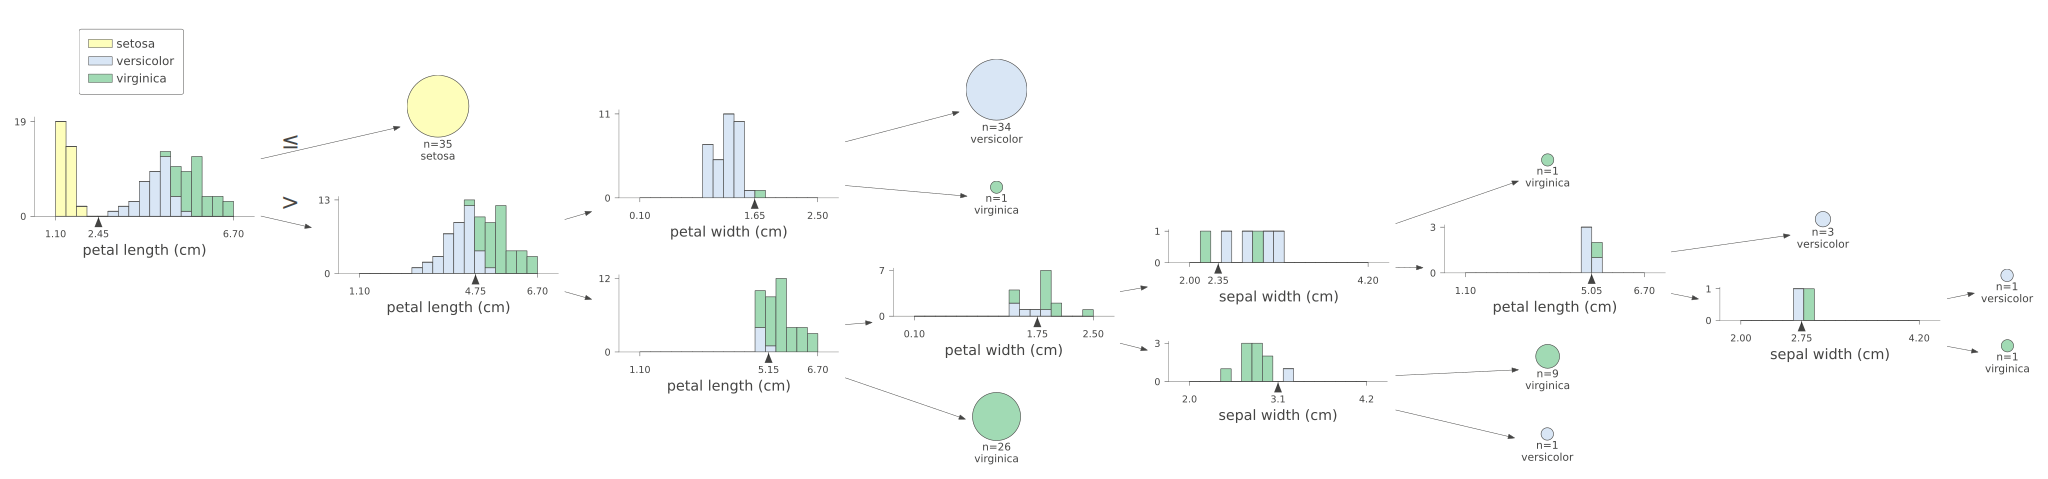

In [61]:
from dtreeviz import model

# Use DataFrame column names explicitly
m = model(tree_clf, 
          X_train,  # DataFrame, keeps feature names
          y_train, 
          feature_names=X.columns.tolist(),  
          class_names=le.classes_.tolist()  # Dynamically get class names
         )

m.view(orientation="LR", scale=2, fontname="DejaVu Sans")


In [63]:
# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 6}


In [65]:
# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [67]:
plot_tree(tree_clf_tuned)

[Text(0.3333333333333333, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2222222222222222, 0.7857142857142857, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.2777777777777778, 0.8571428571428572, 'True  '),
 Text(0.4444444444444444, 0.7857142857142857, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.38888888888888884, 0.8571428571428572, '  False'),
 Text(0.2222222222222222, 0.6428571428571429, 'x[3] <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[2] <= 5.15\nentropy = 0.527\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.5555555555555556, 0.5, 'x[3] <= 1.75\nentropy = 0.896\nsamples = 16\nvalue = [0, 5, 11]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.3

In [71]:
# I got 6 for maximum depth, also the accuracy was higher, I don't know if it was because of value of test/train size

In [81]:
df_clean_iris_set = X.copy()
df_clean_iris_set['iris_name']=Y_Encoded
df_clean_iris_set.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
plt.close()

import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

<Axes: title={'center': 'Pearson Correlation of Features'}>

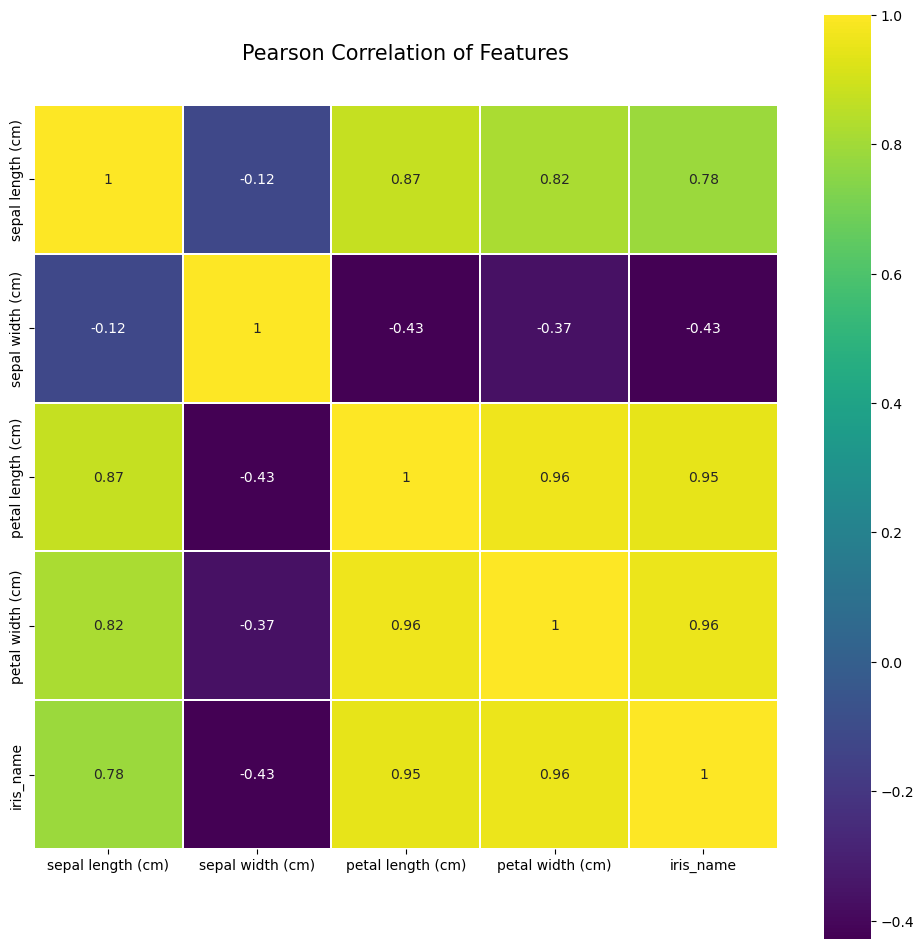

In [91]:
plt.show()

In [93]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
148,6.7,3.0,5.2,2.3
149,6.3,2.5,5.0,1.9
150,6.5,3.0,5.2,2.0
151,6.2,3.4,5.4,2.3


In [101]:
X = df_iris.drop(columns=['petal width (cm)', 'iris_name'])

In [103]:
X

,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
148,6.7,3.0,5.2
149,6.3,2.5,5.0
150,6.5,3.0,5.2
151,6.2,3.4,5.4


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_Encoded, random_state=42)

In [107]:
# Create a decision tree classifier object 
tree_clf_ex = DecisionTreeClassifier(criterion='entropy', random_state=41) 
# Fit the classifier to the training data 
tree_clf_ex.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=41)

In [109]:
# Make predictions on the test set 
y_pred = tree_clf_ex.predict(X_test) 
# Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.95


In [117]:
# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf_ex, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 2}


In [119]:
# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned_2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [121]:
plot_tree(tree_clf_tuned_2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.527\nsamples = 42\nvalue = [0, 5, 37]')]

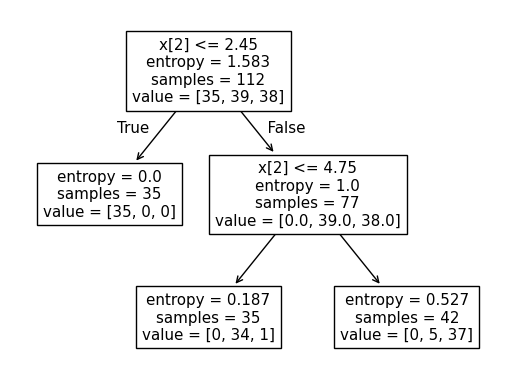

In [123]:
plt.show()